In [2]:
import pandas as pd
from instagrapi import Client
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [3]:

USERNAME1= 'tombs_star'
PASSWORD='Savestar7558!'
cl = Client()
cl.login(USERNAME1, PASSWORD)
cl.dump_settings("session.json")

True

In [ ]:


cl = Client()
cl.load_settings("session.json")
cl.login (USERNAME, PASSWORD) # this doesn't actually login using username/password but uses the session
cl.get_timeline_feed() # check session

In [4]:
cl.delay_range = [3, 5]


In [5]:
hashtag_test=[]

In [6]:
tags1=["Koan", "StellaMcCartney", "MarksandSpencer", "Outerknown"]
tags2=["EileenFisher", "BareKind", "LucyandYak", "Veja", "Asket"]
tags3=[ "Everlane", "AlternativeApparel", "ChristyDawn", "GirlfriendCollective" ]
tags4=["Sezane", "MotherofPearl", "ARMEDANGELS","AmourVert"]


In [7]:
for j in tags1:
    hashtag_test.append(cl.hashtag_info(j)) 

In [8]:
for j in tags2:
    hashtag_test.append(cl.hashtag_info(j)) 

In [9]:
for j in tags3:
    hashtag_test.append(cl.hashtag_info(j)) 

In [10]:
for j in tags4:
    hashtag_test.append(cl.hashtag_info(j)) 

In [11]:
list_name=[]
list_count=[]

In [12]:
for i in hashtag_test:
    list_name.append(i.name)
    list_count.append(i.media_count)

In [13]:
df = pd.DataFrame(list_name)
df1= pd.DataFrame(list_count)
df_combined = pd.concat([df, df1], axis=1)
df_combined.columns=['Name.1', 'Media_count.1']
df_combined['date.1']='2024.05.25'
df_combined

,Name.1,Media_count.1,date.1
0,koan,47411,2024.05.25
1,stellamccartney,1010773,2024.05.25
2,marksandspencer,664000,2024.05.25
3,outerknown,17515,2024.05.25
4,eileenfisher,47800,2024.05.25
5,barekind,1325,2024.05.25
6,lucyandyak,75035,2024.05.25
7,veja,455140,2024.05.25
8,asket,12498,2024.05.25
9,everlane,103405,2024.05.25


In [15]:
df_combined_sorted=df_combined.sort_values(by=['Media_count.1'], ascending=False)
df_combined_sorted=df_combined_sorted.reset_index(drop=True)


In [17]:
df_back=pd.read_csv('data/BrandSus_5_22.csv')
df_back

,Name,Media_count,date
0,stellamccartney,1011200,2024.05.20
1,motherofpearl,729037,2024.05.20
2,marksandspencer,663357,2024.05.20
3,sezane,655657,2024.05.20
4,veja,454275,2024.05.20
5,everlane,103392,2024.05.20
6,lucyandyak,74969,2024.05.20
7,eileenfisher,47788,2024.05.20
8,koan,47329,2024.05.20
9,armedangels,42179,2024.05.20


In [20]:
df_combined = pd.concat([df_combined_sorted, df_back], axis=1)


In [21]:
df_combined

,Name.1,Media_count.1,date.1,Name,Media_count,date
0,stellamccartney,1010773,2024.05.25,stellamccartney,1011200,2024.05.20
1,motherofpearl,729784,2024.05.25,motherofpearl,729037,2024.05.20
2,marksandspencer,664000,2024.05.25,marksandspencer,663357,2024.05.20
3,sezane,656369,2024.05.25,sezane,655657,2024.05.20
4,veja,455140,2024.05.25,veja,454275,2024.05.20
5,everlane,103405,2024.05.25,everlane,103392,2024.05.20
6,lucyandyak,75035,2024.05.25,lucyandyak,74969,2024.05.20
7,eileenfisher,47800,2024.05.25,eileenfisher,47788,2024.05.20
8,koan,47411,2024.05.25,koan,47329,2024.05.20
9,armedangels,42224,2024.05.25,armedangels,42179,2024.05.20


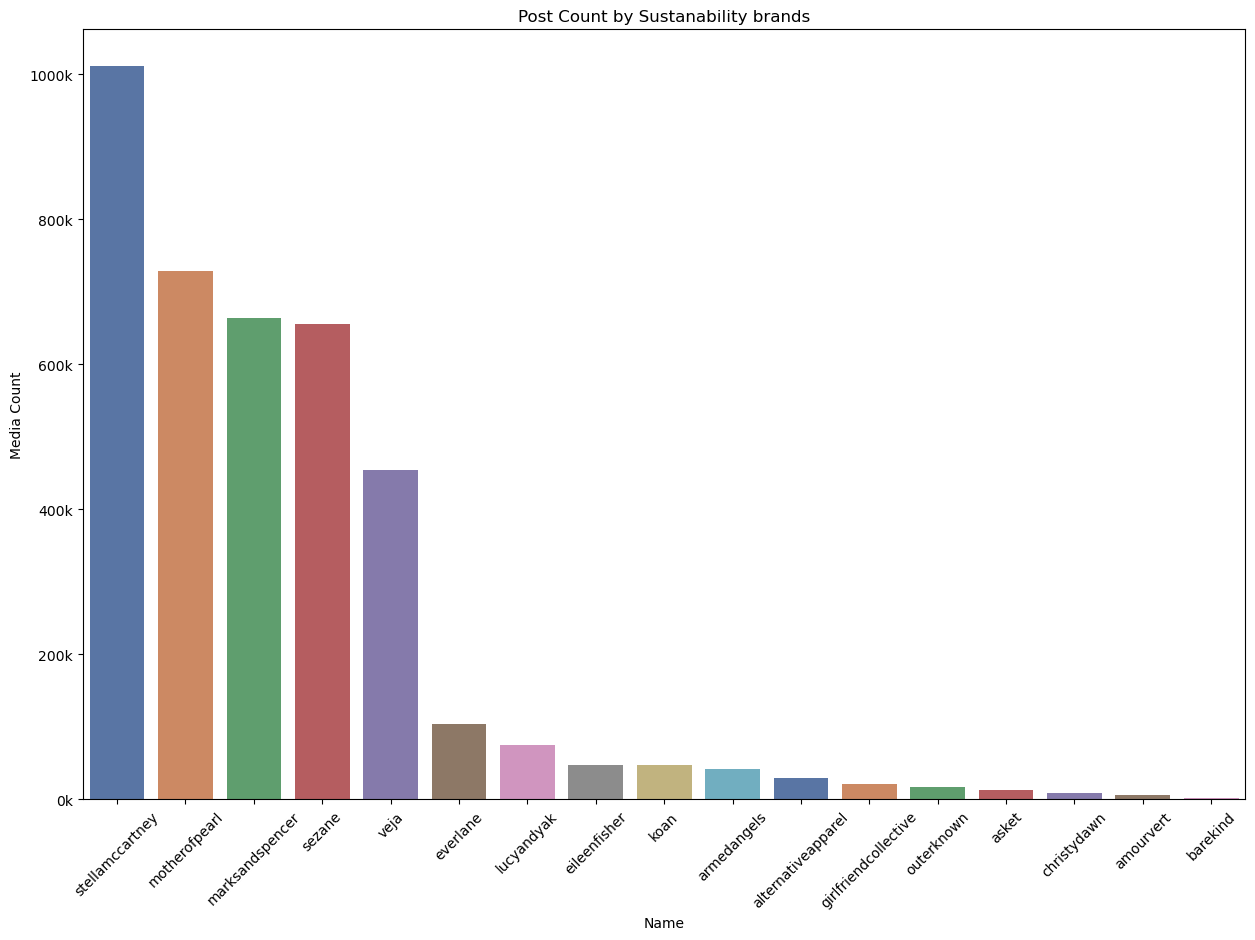

In [28]:

# Assuming df_combined2 has 'Name' and 'Media_count' columns

plt.figure(figsize=(15, 10))
ax= sns.barplot(data=df_combined_sorted.iloc[:], x='Name', y='Media_count', palette='deep')
plt.xlabel('Name')
plt.ylabel('Media Count')
plt.title('Post Count by Sustanability brands')

# Rotate x-axis labels
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}k'.format(x / 1000)))
plt.savefig('data/post_count by sustan.jpeg', format='jpeg', dpi=300)



plt.show()

In [22]:
df_combined.to_csv('data/BrandSus_5_25.csv', index=False)